# Test for the connections

On 12th February - changed the analysis to populate the nodes informations.

In [1]:
from codes.network import generate_network

In [2]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from scipy import stats, spatial

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
G_all = generate_network(level_f='./', label='all')
#G_all = nx.DiGraph()
#create_connections(graph=G_all, level_f='./', label='all')
#create_agents(graph=G_all, level_f='./')
#remove_nodes(graph=G_all, level_f='./')
#print('Nodes remaining after removal: #', len(G_all.nodes()))
#print('Edges remaining after removal #: ', len(G_all.edges()))

Create connections...
Nodes after connections: # 906
Edges created #:  9154

Create agents...
PA
gender
age
class
bmi
height
weight
Removing nodes not in the specified classes...
Nodes removed for not being in the selected classes: # 455
Nodes removed for not having data for BMI: # 16
Nodes remaining after removal: # 435
Edges remaining after removal #:  5744
###############################################################
Graph generated successfuly!
###############################################################



In [5]:
G_gen = generate_network(level_f='./', label='gen')
#G_gen = nx.DiGraph()
#create_connections(graph=G_gen, level_f='./', label='gen')
#create_agents(graph=G_gen, level_f='./')
#remove_nodes(graph=G_gen, level_f='./')
#print('Nodes remaining after removal: #', len(G_gen.nodes()))
#print('Edges remaining after removal #: ', len(G_gen.edges()))

Create connections...
Nodes after connections: # 905
Edges created #:  8304

Create agents...
PA
gender
age
class
bmi
height
weight
Removing nodes not in the specified classes...
Nodes removed for not being in the selected classes: # 454
Nodes removed for not having data for BMI: # 16
Nodes remaining after removal: # 435
Edges remaining after removal #:  5245
###############################################################
Graph generated successfuly!
###############################################################



In [6]:
G_friend = generate_network(level_f='./', label='friend')
#G_friend = nx.DiGraph()
#create_connections(graph=G_friend, level_f='./', label='friend')
#create_agents(graph=G_friend, level_f='./')
#remove_nodes(graph=G_friend, level_f='./')
#print('Nodes remaining after removal: #', len(G_friend.nodes()))
#print('Edges remaining after removal #: ', len(G_friend.edges()))

Create connections...
Nodes after connections: # 897
Edges created #:  5562

Create agents...
PA
gender
age
class
bmi
height
weight
Removing nodes not in the specified classes...
Nodes removed for not being in the selected classes: # 446
Nodes removed for not having data for BMI: # 16
Nodes remaining after removal: # 435
Edges remaining after removal #:  3533
###############################################################
Graph generated successfuly!
###############################################################



In [74]:
# All the nodes are present in all the three graphs
len(set(G_all.nodes()).intersection(G_gen.nodes())), len(set(G_all.nodes()).intersection(G_friend.nodes())), \
    len(set(G_friend.nodes()).intersection(G_gen.nodes()))

(435, 435, 435)

In [75]:
len(set(G_all.nodes()).difference(G_gen.nodes())), len(set(G_all.nodes()).difference(G_friend.nodes())), \
    len(set(G_friend.nodes()).difference(G_gen.nodes()))

(0, 0, 0)

In [ ]:
# graph5 = nx.DiGraph()

# formula_s = '{ \
#     "DI_Com_Network": 1, \
#     "DI_Impression_management": 0, \
#     "DI_Modelling": 0, \
#     "GEN_Advice": 0.5, \
#     "GEN_Friendship": 1, \
#     "GEN_Leader": 1, \
#     "GEN_Respect": 1, \
#     "GEN_Social_Facilitation": 1, \
#     "GEN_Want2B": 1, \
#     "ME_Com_Network": 0, \
#     "PA_Com_Network": 1, \
#     "PA_Impression_Management": 0, \
#     "PA_Modelling": 0.3 }'
# G5 = create_connections(graph=graph5, level_f='./', label='customized', formula_s=formula_s)

# Measurements for the graphs

### Degree distribution histogram

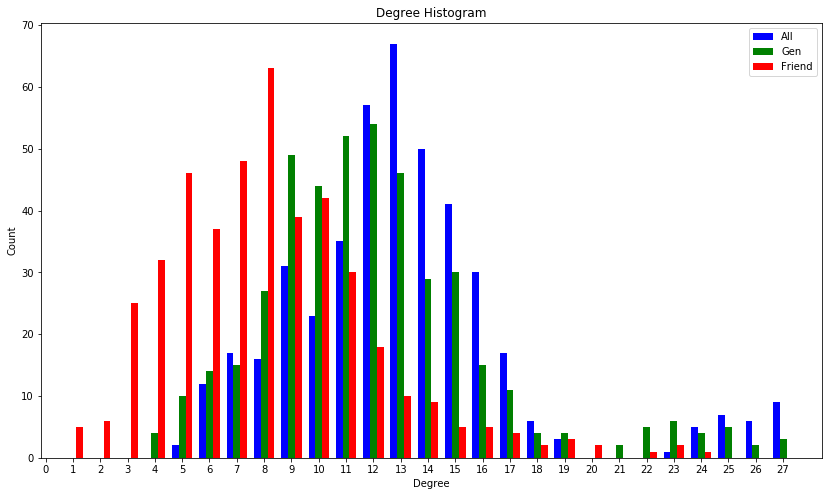

In [57]:
degree_sequence_all = sorted([d for n, d in G_all.out_degree()], reverse=True)  # degree sequence
degree_sequence_friend = sorted([d for n, d in G_friend.out_degree()], reverse=True)  # degree sequence
degree_sequence_gen = sorted([d for n, d in G_gen.out_degree()], reverse=True)  # degree sequence

degreeCount_all = collections.Counter(degree_sequence_all)
degreeCount_friend = collections.Counter(degree_sequence_friend)
degreeCount_gen = collections.Counter(degree_sequence_gen)

deg_all, cnt_all = zip(*degreeCount_all.items())
deg_friend, cnt_friend = zip(*degreeCount_friend.items())
deg_gen, cnt_gen = zip(*degreeCount_gen.items())

fig, ax = plt.subplots(figsize=((14,8)))

width = 0.25
x_all = [x-width for x in deg_all]
x_gen = [x for x in deg_gen]
x_friend = [x+width for x in deg_friend]

#plt.bar(list(deg_all), cnt_all, width=0.80, color='b', alpha=0.5)
ax.bar(x_all, cnt_all, width=width,color='b',align='center', label='All')
ax.bar(x_gen, cnt_gen, width=width,color='g',align='center', label='Gen')
ax.bar(x_friend, cnt_friend, width=width,color='r',align='center', label='Friend')
#plt.bar(list(deg_gen), cnt_gen, width=0.80, color='r', alpha=0.5)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks(range(28))
plt.legend()



In [60]:
dist_all, _ = np.histogram(degree_sequence_all, bins=np.arange(28))
dist_gen, _ = np.histogram(degree_sequence_gen, bins=np.arange(28))
dist_friend, _ = np.histogram(degree_sequence_friend, bins=np.arange(28))

In [62]:
np.histogram(degree_sequence_all, bins=np.arange(28))

(array([ 0,  0,  0,  0,  0,  2, 12, 17, 16, 31, 23, 35, 57, 67, 50, 41, 30,
        17,  6,  3,  0,  0,  0,  1,  5,  7, 15]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]))

In [63]:
stats.pearsonr(dist_all, dist_gen)

(0.8555656456080973, 1.2956699707564492e-08)

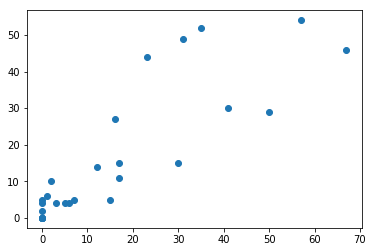

In [64]:
plt.scatter(dist_all, dist_gen)

In [65]:
stats.pearsonr(dist_all, dist_friend)

(0.1230164602852648, 0.541004552837999)

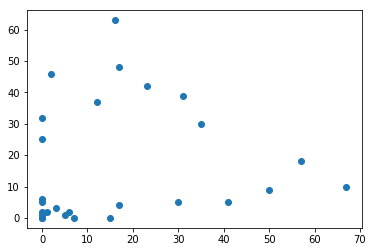

In [66]:
plt.scatter(dist_all, dist_friend)

In [67]:
stats.pearsonr(dist_friend, dist_gen)

(0.43136157037423584, 0.02466890436432335)

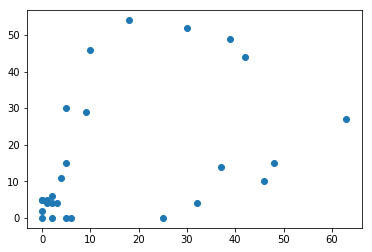

In [68]:
plt.scatter(dist_friend, dist_gen)

## Clusters characteristics

In [69]:
clusters_all = list(nx.strongly_connected_component_subgraphs(G_all))
clusters_gen = list(nx.strongly_connected_component_subgraphs(G_gen))
clusters_friends = list(nx.strongly_connected_component_subgraphs(G_friend))

In [71]:
len(clusters_all), len(clusters_gen), len(clusters_friends)

(31, 31, 40)

In [72]:
len([67, 71, 72, 74, 77, 78, 79, 81, 83, 86, 100, 101, 103, 121, 122, 125, 126, 127, 129, 130, 131, 133, 135, 136, 138, 139])

26

In [85]:
# Create a dictionary. Keys are the classes, and the values are list of students
class_list = [67, 71, 72, 74, 77, 78, 79, 81, 83, 86, 100, 101, 103, 121, 122, 125, 126, 127, 129, 130, 131, 133, 135, 136, 138, 139]
class_dictionary = {}
for c in class_list:
    class_dictionary[c] = []

for node, key in G_all.nodes.data('class'):
    class_dictionary[int(key)].append(node)

In [89]:
# Clusters are classes.
class_dictionary.keys()

dict_keys([67, 71, 72, 74, 77, 78, 79, 81, 83, 86, 100, 101, 103, 121, 122, 125, 126, 127, 129, 130, 131, 133, 135, 136, 138, 139])

In [98]:
# Get the subgraph for each cluster
graphs_all_list = {}
graphs_gen_list = {}
graphs_friend_list = {}

for c in class_list:
    graphs_all_list[c] = G_all.subgraph(class_dictionary[c])
    graphs_gen_list[c] = G_gen.subgraph(class_dictionary[c])
    graphs_friend_list[c] = G_friend.subgraph(class_dictionary[c])

In [102]:
graphs_all_list[67], graphs_gen_list[67], graphs_friend_list[67]

(<networkx.classes.graphviews.SubDiGraph at 0x1152f86a0>,
 <networkx.classes.graphviews.SubDiGraph at 0x1152f8128>)

In [129]:
# Number of nodes in each cluster for each set of questions
print('Number of nodes')
print('--------------------------------')
print('Class\t # All\t # Gen\t # Friend')
print('--------------------------------')
for c in class_list:
    print(c, '\t', graphs_all_list[c].number_of_nodes(), '\t', graphs_gen_list[c].number_of_nodes(), 
          '\t', graphs_friend_list[c].number_of_nodes())
print('--------------------------------')

Number of nodes
--------------------------------
Class	 # All	 # Gen	 # Friend
--------------------------------
67 	 18 	 18 	 18
71 	 20 	 20 	 20
72 	 17 	 17 	 17
74 	 11 	 11 	 11
77 	 19 	 19 	 19
78 	 20 	 20 	 20
79 	 25 	 25 	 25
81 	 28 	 28 	 28
83 	 14 	 14 	 14
86 	 15 	 15 	 15
100 	 18 	 18 	 18
101 	 18 	 18 	 18
103 	 17 	 17 	 17
121 	 12 	 12 	 12
122 	 11 	 11 	 11
125 	 16 	 16 	 16
126 	 10 	 10 	 10
127 	 13 	 13 	 13
129 	 8 	 8 	 8
130 	 21 	 21 	 21
131 	 11 	 11 	 11
133 	 19 	 19 	 19
135 	 18 	 18 	 18
136 	 18 	 18 	 18
138 	 20 	 20 	 20
139 	 18 	 18 	 18
--------------------------------


In [130]:
# Number of edges in each cluster for each set of questions
print('Number of edges')
print('--------------------------------')
print('Class\t # All\t # Gen\t # Friend')
print('--------------------------------')
for c in class_list:
    print(c, '\t', graphs_all_list[c].number_of_edges(), '\t', graphs_gen_list[c].number_of_edges(), 
          '\t', graphs_friend_list[c].number_of_edges())
print('--------------------------------')

Number of edges
--------------------------------
Class	 # All	 # Gen	 # Friend
--------------------------------
67 	 231 	 205 	 138
71 	 269 	 247 	 112
72 	 218 	 180 	 93
74 	 95 	 93 	 76
77 	 245 	 223 	 164
78 	 320 	 303 	 221
79 	 303 	 275 	 183
81 	 717 	 663 	 484
83 	 159 	 142 	 110
86 	 167 	 166 	 146
100 	 265 	 255 	 163
101 	 232 	 205 	 161
103 	 243 	 221 	 171
121 	 96 	 90 	 56
122 	 92 	 84 	 55
125 	 195 	 186 	 136
126 	 80 	 80 	 65
127 	 119 	 108 	 72
129 	 54 	 51 	 36
130 	 305 	 259 	 136
131 	 85 	 70 	 44
133 	 231 	 201 	 132
135 	 279 	 272 	 189
136 	 260 	 235 	 152
138 	 265 	 255 	 162
139 	 219 	 176 	 76
--------------------------------


In [128]:
# Maximum number of edges in each cluster for each set of questions
print('Maximum edges possible')
print('--------------------------------')
print('Class\t # All\t # Gen\t # Friend')
print('--------------------------------')
for c in class_list:
    print(c, '\t', graphs_all_list[c].number_of_nodes()**2-graphs_all_list[c].number_of_nodes(), 
             '\t', graphs_gen_list[c].number_of_nodes()**2-graphs_gen_list[c].number_of_nodes(), 
             '\t', graphs_friend_list[c].number_of_nodes()**2-graphs_friend_list[c].number_of_nodes())
print('--------------------------------')

Maximum edges possible
--------------------------------
Class	 # All	 # Gen	 # Friend
--------------------------------
67 	 306 	 306 	 306
71 	 380 	 380 	 380
72 	 272 	 272 	 272
74 	 110 	 110 	 110
77 	 342 	 342 	 342
78 	 380 	 380 	 380
79 	 600 	 600 	 600
81 	 756 	 756 	 756
83 	 182 	 182 	 182
86 	 210 	 210 	 210
100 	 306 	 306 	 306
101 	 306 	 306 	 306
103 	 272 	 272 	 272
121 	 132 	 132 	 132
122 	 110 	 110 	 110
125 	 240 	 240 	 240
126 	 90 	 90 	 90
127 	 156 	 156 	 156
129 	 56 	 56 	 56
130 	 420 	 420 	 420
131 	 110 	 110 	 110
133 	 342 	 342 	 342
135 	 306 	 306 	 306
136 	 306 	 306 	 306
138 	 380 	 380 	 380
139 	 306 	 306 	 306
--------------------------------


In [127]:
# Density in each cluster for each set of questions
print("Density")
print('--------------------------------')
print('Class\t D. All\t D. Gen\t D. Friend')
print('--------------------------------')
for c in class_list:
    max_all = graphs_all_list[c].number_of_nodes()**2-graphs_all_list[c].number_of_nodes()
    max_gen = graphs_gen_list[c].number_of_nodes()**2-graphs_gen_list[c].number_of_nodes()
    max_friend = graphs_friend_list[c].number_of_nodes()**2-graphs_friend_list[c].number_of_nodes()
    dens_all = graphs_all_list[c].number_of_edges()/max_all
    dens_gen = graphs_gen_list[c].number_of_edges()/max_gen
    dens_friend = graphs_friend_list[c].number_of_edges()/max_friend
    #{0:.2f}
    print('{0} \t {1:.2f} \t {2:.2f} \t {3:.2f}'.format(c, dens_all, dens_gen, dens_friend))

print('--------------------------------')

Density
--------------------------------
Class	 D. All	 D. Gen	 D. Friend
--------------------------------
67 	 0.75 	 0.67 	 0.45
71 	 0.71 	 0.65 	 0.29
72 	 0.80 	 0.66 	 0.34
74 	 0.86 	 0.85 	 0.69
77 	 0.72 	 0.65 	 0.48
78 	 0.84 	 0.80 	 0.58
79 	 0.51 	 0.46 	 0.30
81 	 0.95 	 0.88 	 0.64
83 	 0.87 	 0.78 	 0.60
86 	 0.80 	 0.79 	 0.70
100 	 0.87 	 0.83 	 0.53
101 	 0.76 	 0.67 	 0.53
103 	 0.89 	 0.81 	 0.63
121 	 0.73 	 0.68 	 0.42
122 	 0.84 	 0.76 	 0.50
125 	 0.81 	 0.78 	 0.57
126 	 0.89 	 0.89 	 0.72
127 	 0.76 	 0.69 	 0.46
129 	 0.96 	 0.91 	 0.64
130 	 0.73 	 0.62 	 0.32
131 	 0.77 	 0.64 	 0.40
133 	 0.68 	 0.59 	 0.39
135 	 0.91 	 0.89 	 0.62
136 	 0.85 	 0.77 	 0.50
138 	 0.70 	 0.67 	 0.43
139 	 0.72 	 0.58 	 0.25
--------------------------------


In [146]:
def get_hamming_distance(g1, g2):
    '''
    Receives 2 graphs
    Returns the hamming distance of the 2 graphs based on the presence/absence of edges
    '''
    if len(set(g1.nodes()).difference(set(g2.nodes()))) != 0:
        print('Problem! The set of nodes is different between the graphs!')
        return
        
    max_edges = g1.number_of_nodes()**2-g1.number_of_nodes()
    # Set theory
    diff_12 = len(g1.edges()) + len(g2.edges()) - len(set(g1.edges()).intersection(set(g2.edges())))*2
    
    return diff_12/max_edges

In [154]:
# Density in each cluster for each set of questions
print("Hamming distance")
print('-----------------------------------------------------')
print('Class\t All x Gen\t Gen x Friend\t All x Friend')
print('-----------------------------------------------------')
for c in class_list:
    hd_all_gen = get_hamming_distance(graphs_all_list[c], graphs_gen_list[c])
    hd_gen_friend = get_hamming_distance(graphs_gen_list[c], graphs_friend_list[c])
    hd_all_friend = get_hamming_distance(graphs_all_list[c], graphs_friend_list[c])
    
    #{0:.2f}
    print('{0} \t {1:.2f} \t\t {2:.2f} \t\t {3:.2f}'.format(c, hd_all_gen, hd_gen_friend, hd_all_friend))

print('-----------------------------------------------------')

Hamming distance
-----------------------------------------------------
Class	 All x Gen	 Gen x Friend	 All x Friend
-----------------------------------------------------
67 	 0.08 		 0.22 		 0.30
71 	 0.06 		 0.36 		 0.41
72 	 0.14 		 0.32 		 0.46
74 	 0.02 		 0.15 		 0.17
77 	 0.06 		 0.17 		 0.24
78 	 0.04 		 0.22 		 0.26
79 	 0.05 		 0.15 		 0.20
81 	 0.07 		 0.24 		 0.31
83 	 0.09 		 0.18 		 0.27
86 	 0.00 		 0.10 		 0.10
100 	 0.03 		 0.30 		 0.33
101 	 0.09 		 0.14 		 0.23
103 	 0.08 		 0.18 		 0.26
121 	 0.05 		 0.26 		 0.30
122 	 0.07 		 0.26 		 0.34
125 	 0.04 		 0.21 		 0.25
126 	 0.00 		 0.17 		 0.17
127 	 0.07 		 0.23 		 0.30
129 	 0.05 		 0.27 		 0.32
130 	 0.11 		 0.29 		 0.40
131 	 0.14 		 0.24 		 0.37
133 	 0.09 		 0.20 		 0.29
135 	 0.02 		 0.27 		 0.29
136 	 0.08 		 0.27 		 0.35
138 	 0.03 		 0.24 		 0.27
139 	 0.14 		 0.33 		 0.47
-----------------------------------------------------


### Hamming distance

The Hamming distance has to be calculated based on each cluster.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.hamming.html
    
http://www.casos.cs.cmu.edu/events/summer_institute/2016/reading_list/day3_kenny_qap_pdf.pdf

### All vs. Gen

In [ ]:
num_edges_all = len(list(G_all.edges()))
num_edges_gen = len(list(G_gen.edges()))

In [ ]:
num_edges_all, num_edges_gen

In [ ]:
len(set(G_all.edges()).intersection(G_gen.edges()))

In [ ]:
# Create a mask between the matrices and calculate the difference
m_all = pd.DataFrame(nx.convert_matrix.to_numpy_matrix(G_all))
#m_gen = pd.read_csv('./results/connections_gen.csv', index_col=0)
#m_friend = pd.read_csv('./results/connections_friend.csv', index_col=0)

In [ ]:
# Create a binary matrix. True if edge exists and False otherwise.
bin_all = m_all>0
#bin_gen = m_gen>0
#bin_friend = m_friend > 0

In [ ]:
bin_all

In [ ]:
# Flatten the arrays
vec_all = [item for sublist in bin_all.values for item in sublist]
vec_gen = [item for sublist in bin_gen.values for item in sublist]
vec_friend = [item for sublist in bin_friend.values for item in sublist]

In [ ]:
spatial.distance.hamming(vec_all, vec_gen)

In [ ]:
spatial.distance.hamming(vec_all, vec_friend)

In [ ]:
spatial.distance.hamming(vec_friend, vec_gen)

In [ ]:
# Density (953*953 is the squared matrix)
sum(vec_friend)/(953*953) %len(vec_friend)

In [ ]:
sum(vec_gen)/(953*953)%len(vec_gen)

In [ ]:
sum(vec_all)/(953*953)%len(vec_all)

In [ ]:
stats.pearsonr(vec_all, vec_friend)

In [ ]:
stats.pearsonr(vec_all, vec_gen)

In [ ]:
stats.pearsonr(vec_gen, vec_friend)

# Trial of MR-QAP

https://www.slideshare.net/frbkrm/mrqap-tutorial-for-newbies

In [ ]:
len(G_all.edges())

In [ ]:
sum(vec_all)

# Converting graph to numpy

In [ ]:
nx.convert_matrix.to_numpy_matrix(G_all)

In [ ]:
list(nx.strongly_connected_component_subgraphs(G_all))

In [ ]:
G_all.nodes(data=True)